<a href="https://colab.research.google.com/github/trishnak99/ai-colab4/blob/master/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All of the information in this notebook derived from the resources posted in Dr. Wocjan's GitHub

##General concepts

###What is artificial intelligence
There are many definitions of artificial intelligence, but essentially it describe a machine and its capability to demonstrate intelligent behavior of humans, such as visual perception, decision-making, and speech recognition.

Artificial intelligence systems are propvided with input and rules in order to produce output.

###Machine learning
Machine learning is a dynamic subset of artificial intelligence in that it does not requires human intervention to make certain changes.

Machine learning systems are provided input (training data or features) and output (labels) in order to produce rules. In other words, the systems determine the patterns and improve upon them with numerous inputs and outputs. These patterns constitute as the model, which is the relationship between the feature and the labels. This model can then serve as predictions for new data. This essentially creates a neural network.

There are at least two types of machine learning: supervised learning and unsupervised learning:
*   Supervised learning is where a model is provided with labeled training data.
*   Unsupervised learning is where a model is provided with unlabeled training data.

###Deep Learning
Deep Learning is a subset of machine learning that deals with unsupervised learning. An application of deep learning is convolutional neural networks.

###Neural Network Diagram

The following diagram of a neural netowrk is a good depiction of what occurs (taken from Dr. Wocjan's GitHub)


```
                              Input X
                                |
                                V
+-----------+       +-------------------------+
|  Weights  |  -->  |          Layer          |
+-----------+       |  (data transformation)  |
                    +-------------------------+
                                |
                                V
+-----------+       +-------------------------+
|  Weights  |  -->  |          Layer          |
+-----------+       |  (data transformation)  |
      ^             +-------------------------+                         
      | update                  |
      | weight                  V
      |                 +---------------+              +----------------+
      |                 |  Predictions  |              |  True targets  |
      |                 |      ^y       |              |       y        |
      |                 +---------------+              +----------------+
      |                         |                             |
      |                         |     +-----------------+     |
      |                         +---->|  Loss function  |<----+
+-------------+                       +-----------------+
|  Optimizer  |                                |
+-------------+                                |
      ^                                        V
      |                                +--------------+      
      +--------------------------- ----|  Loss score  |
                                       +--------------+
```



##Building a model

###Linear regression and gradient descent
One of the basic ideas to keep in mind when building a model is the linear regression relationship when graphing, since it predicts continuous values. Similar to a linear equation of y = mx + b, linear regression using an equation similar to ŷ = w1x1 + b, where w1 is the weight and b is the bias term. ŷ in this case refers to the predicted label outcome.

Gradient descent refers to the optimization, or minimization, of a function. In other words, it is used to find the minimum of a function. In our first homework, we demonstrated graphs of functions which use local minimums, local maximums, and saddle points. Those minimums are found in the machine learning model using gradient descent in order to update the weight and bias. The idea is to perform linear regression using a batch of features to calculate the gradient throughout a single or multiple iterations.

There are three types of gradient descent.

Stochastic gradient descent uses only one example (i.e. a batch size of 1) per iteration to calculate the gradient.

Batch gradient descent uses all of the examples provided to calculate the gradient.

Mini-batch stochastic gradient descent uses anywhere from 10 to 1000 exampels to calculate gradient descent.

###Setting up the model in Python

The following imports below are important building and training the model, visualizing the data, and analyzing the data.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

###Activation functions

Activation functions are usually meant to add non-linearity to the output by calculating weighted sums with biases.

Several activation functions are used in this class, including softmax, ReLu, and sigmoid.

Sigmoid is f(x) = 1/ (1 + e^-x)

ReLu is f(x) = max(0,x)

Softmax is usually used in the output layer of a model and results in the probability distribution of several potential outputs.

###Other features of building models

One is adjusting the learning rate. If the learning rate is too large, a large amount of data will be missed in the prediction. If the learning rate is too small, the rate of training will be very slow, as too much data will be considered.

Modifying the batch size means adjusting the number of features to be used in each cycle of the model.

Adding dropout layers allows the model to disregard some data from each layer. For example, if a Dropout is set as 0.25, 25% of the inputs from layer before it will be randomly excluded from getting passed to the next layer.

Data augmentation is a technique that can be used to include additional data regarding the training dataset. Examples of this include adding measurements of areas in the image and determining the number of white regions in an image.

###Sequential neural networks

Sequential neural networks are created using dense layers. 

An example is shown below of how it would look in Python.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.21),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.22),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.23),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

###Convolutional neural networks

Convolutional neural networks are created using several types of layers. and primarily use ReLu activation.

In a basic convolutional neural network, Conv2D layers are followed by MaxPooling2D layers, and it continues in this pattern. The Conv2D layers perform a convlution to create several feature maps from the images. The MaxPooling2D layers then perform subsampling by using filter windows across the feature maps to get a single value for each window.

Then the layers are flattened to a single vector. A normal dense layer is then added to fully connect the neurons in the layers. 

Finally, an output layer is also added that uses softmax activation to create the probability distribution.

An example is shown below.

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.23),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.36),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

##Comping a model

When compiling a model, there are some things to consider: optimizers, loss, and metrics. These affect the learning rate and how output is produced and represented.

Optimizers include stochastic gradient descent and RMSprop.

Loss refers to the type of error that the model considers, such as mean squared error, or sparse categorical cross-entropy.

Metrics are used to analyze the performance of a model and can vary. In this class, we mainly used accuracy.

##Training a model

The goal when training a model is to mazimize the accuracy and minimize the loss as much as possible. Training a model involves starting with a guess for the weights and bias, and adjusting these values until the lowest loss is obtained. 

In Python, this invovles setting a number of epochs and steps per epoch in order to tell the program how many times to run the model. Training the model too many times and training the model too little times can both be bad.

With this comes the concepts of underfitting and overfitting. 

Underfitting is when the training accuracy and the testing accuracy are both low.

Overfitting is when the training accuracy is higher than the testing accuracy.

Below is an example of underfitting

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
    keras.layers.Dropout(0.35)
    
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 5.3385 - acc: 0.3893 - val_loss: 1.8864 - val_acc: 0.5902
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 4.3258 - acc: 0.4563 - val_loss: 1.8772 - val_acc: 0.6206
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 4.1869 - acc: 0.4683 - val_loss: 1.8321 - val_acc: 0.6345
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 4.0674 - acc: 0.4825 - val_loss: 1.8378 - val_acc: 0.6435
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 3.9901 - acc: 0.4886 - val_loss: 1.7683 - val_acc: 0.6697
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 3.9386 - acc: 0.4976 - val_loss: 1.7619 - val_acc: 0.6809
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 3.8745 - acc: 0.5066 - val_l

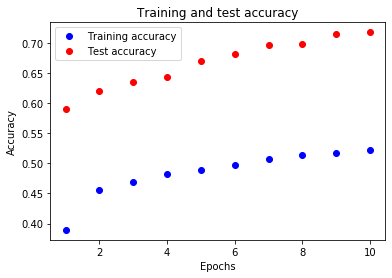

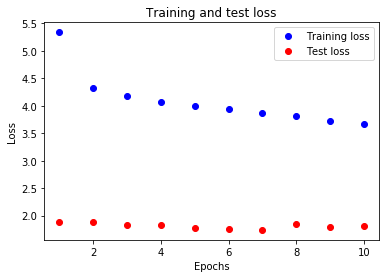

In [0]:
def graphAcc(history):
  history_dict = history.history
  acc_values = history_dict['acc']
  test_acc_values = history_dict['val_acc']
  epochs_range = range(1, epochs+1)

  plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def graphLoss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  test_loss_values = history_dict['val_loss']
  epochs_range = range(1, epochs + 1)
  
  plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
  plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

graphAcc(history)
graphLoss(history)

Below is an example of overfitting

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128*4, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4729 - acc: 0.8313 - val_loss: 0.4120 - val_acc: 0.8523
Epoch 2/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3602 - acc: 0.8683 - val_loss: 0.3764 - val_acc: 0.8669
Epoch 3/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3208 - acc: 0.8827 - val_loss: 0.3821 - val_acc: 0.8553
Epoch 4/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2984 - acc: 0.8901 - val_loss: 0.3568 - val_acc: 0.8756
Epoch 5/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2806 - acc: 0.8953 - val_loss: 0.3395 - val_acc: 0.8752
Epoch 6/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2666 - acc: 0.9001 - val_loss: 0.3188 - val_acc: 0.8879
Epoch 7/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2532 - acc: 0.9059 - val_l

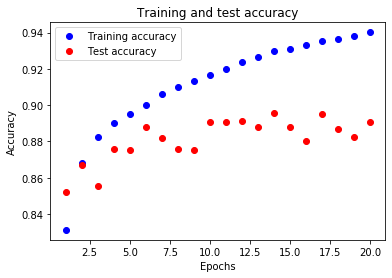

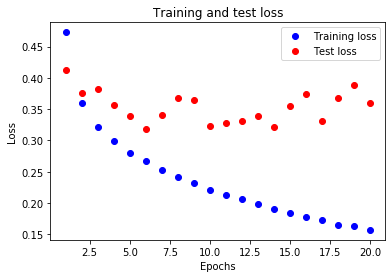

In [0]:
def graphAcc(history):
  history_dict = history.history
  acc_values = history_dict['acc']
  test_acc_values = history_dict['val_acc']
  epochs_range = range(1, epochs+1)

  plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def graphLoss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  test_loss_values = history_dict['val_loss']
  epochs_range = range(1, epochs + 1)
  
  plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
  plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  
graphAcc(history)
graphLoss(history)

##Finetuning a pretrained model

When finetuning a pretrained model, there are multiple steps that should be performed.

The first steps included loading the pretrained model and adding the new training layers.

Next, the base network should be frozen.

The added layers are then compiled and trained separately apart from the base model.

The final step is to unfreeze the base network and train the based network and the added layers together.